In [ ]:
import torch
from CAETomo.cae import cae
from tkinter import Tk
import tkinter.filedialog as tkf

root = Tk()
root.attributes('-topmost', True)  # Display the dialog in the foreground.
root.iconify()

In [ ]:
file_adr = tkf.askopenfilenames()
print(*file_adr, sep="\n")

In [ ]:
# dat_dim: dimensions of hyperspectral data
# cr_range: crop spectra in a certain range of interest, [start, end, step]
#           float -> only for DM files (EELS spectrum images)
#           integer -> index range (the actual step size can be specified using dat_scale)
# rescale: if True, each hyperspectral data will be divided by its maximum value

CAE = cae(file_adr, dat_dim=3, dat_unit='eV', cr_range=[1.0, 3.56, 0.01], dat_scale=1.0, rescale=False, DM_file=True)

In [4]:
# prepare the input dataset (flatten and merge)
CAE.make_input(min_val=1E-6, max_normalize=True, rescale_0to1=False, final_dim=1)

(104760, 256)
(104760,)
0.0005269607549468128 1.0
0.0005269607549468128 1.0


In [5]:
if torch.cuda.is_available():
    print("%d gpu available"%(torch.cuda.device_count()))
    cuda_device = torch.device("cuda:0")
    print(torch.cuda.get_device_name(cuda_device))
    torch.cuda.set_device(cuda_device)
else:
    cuda_device = None

1 gpu available
NVIDIA GeForce RTX 4050 Laptop GPU


In [6]:
# The parameters below are optimized for EELS with 256 energy channels

num_comp = 5
channels = [8, 16, 32, num_comp]
kernels = [64, 32, 16, 0]
pooling = [2, 2, 2, 2]

CAE.create_autoencoder(num_comp=num_comp, channels=channels,
                       kernels=kernels, pooling=pooling, cuda_device=cuda_device)

dimensions of the encoded data [96, 32, 8, 1]
kernels [64, 32, 16, 7]
channels [8, 16, 32, 5]
poolings [2, 2, 2, 2]
torch.Size([8, 1, 64])
torch.Size([8])
torch.Size([8])
torch.Size([8])
torch.Size([16, 8, 32])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([32, 16, 16])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([5, 32, 7])
torch.Size([5])
torch.Size([5])
torch.Size([5])
14103
CAE1D_encoder(
  (encoder): Sequential(
    (0): Conv1d(1, 8, kernel_size=(64,), stride=(1,))
    (1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
    (4): Conv1d(8, 16, kernel_size=(32,), stride=(1,))
    (5): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
    (8): Conv1d(16, 32, kernel_size=(16,), stride=(1,))
    (9): BatchNorm1d(32, eps=1e-05, momentu

In [7]:
batch_size = 8730
CAE.create_mini_batch(batch_size)

number of mini-batches 12


|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |  43269 KiB | 476757 KiB | 734760 MiB | 734718 MiB |
|       from large pool |  42830 KiB | 476369 KiB | 733238 MiB | 733197 MiB |
|       from small pool |    439 KiB |   1749 KiB |   1521 MiB |   1520 MiB |
|---------------------------------------------------------------------------|
| Active memory         |  43269 KiB | 476757 KiB | 734760 MiB | 734718 MiB |
|       from large pool |  42830 KiB | 476369 KiB | 733238 MiB |

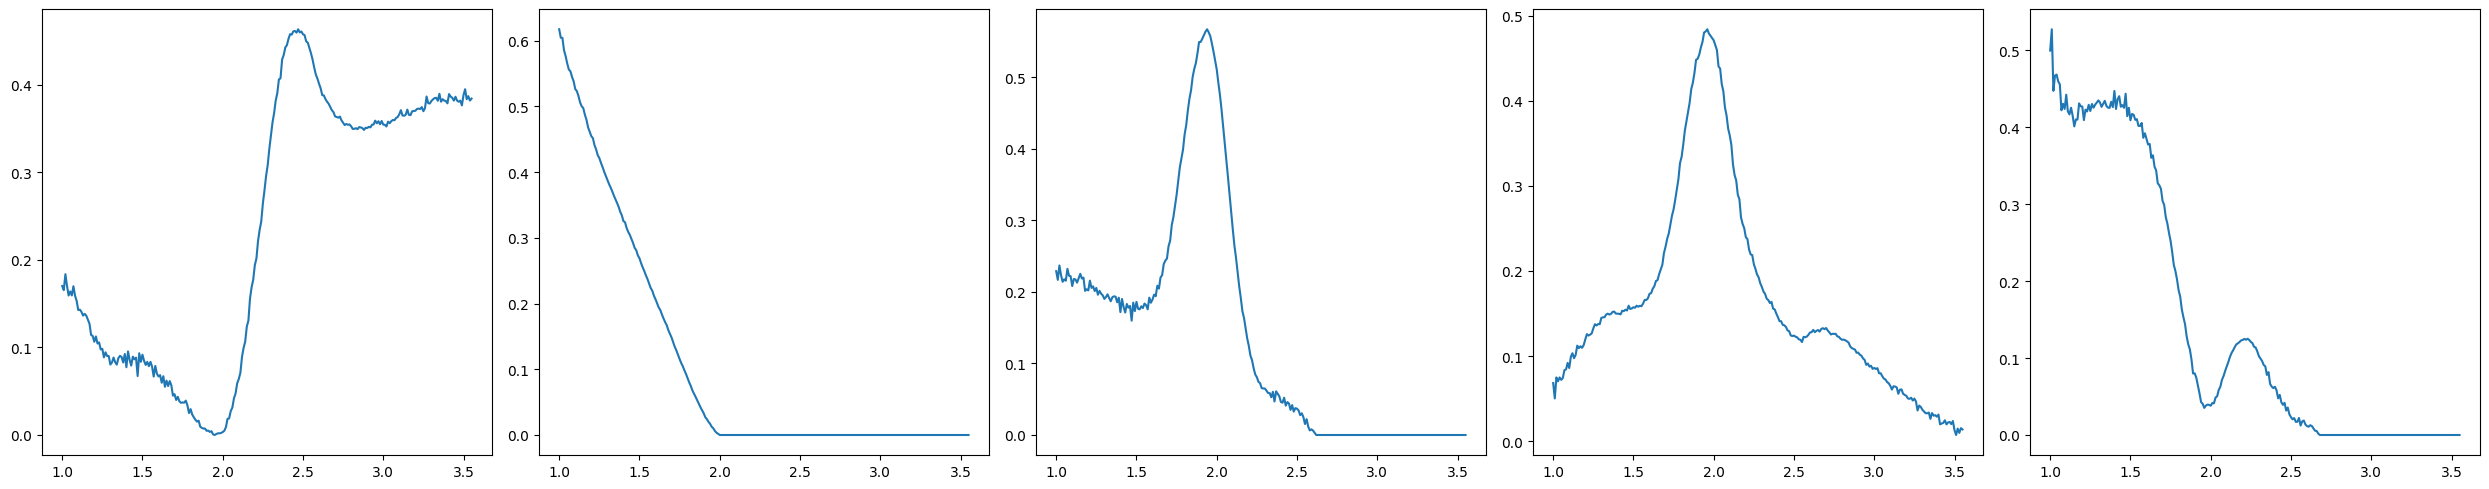

-----  -----------
epoch  40
loss    0.00879082
-----  -----------
0.42 minutes have passed


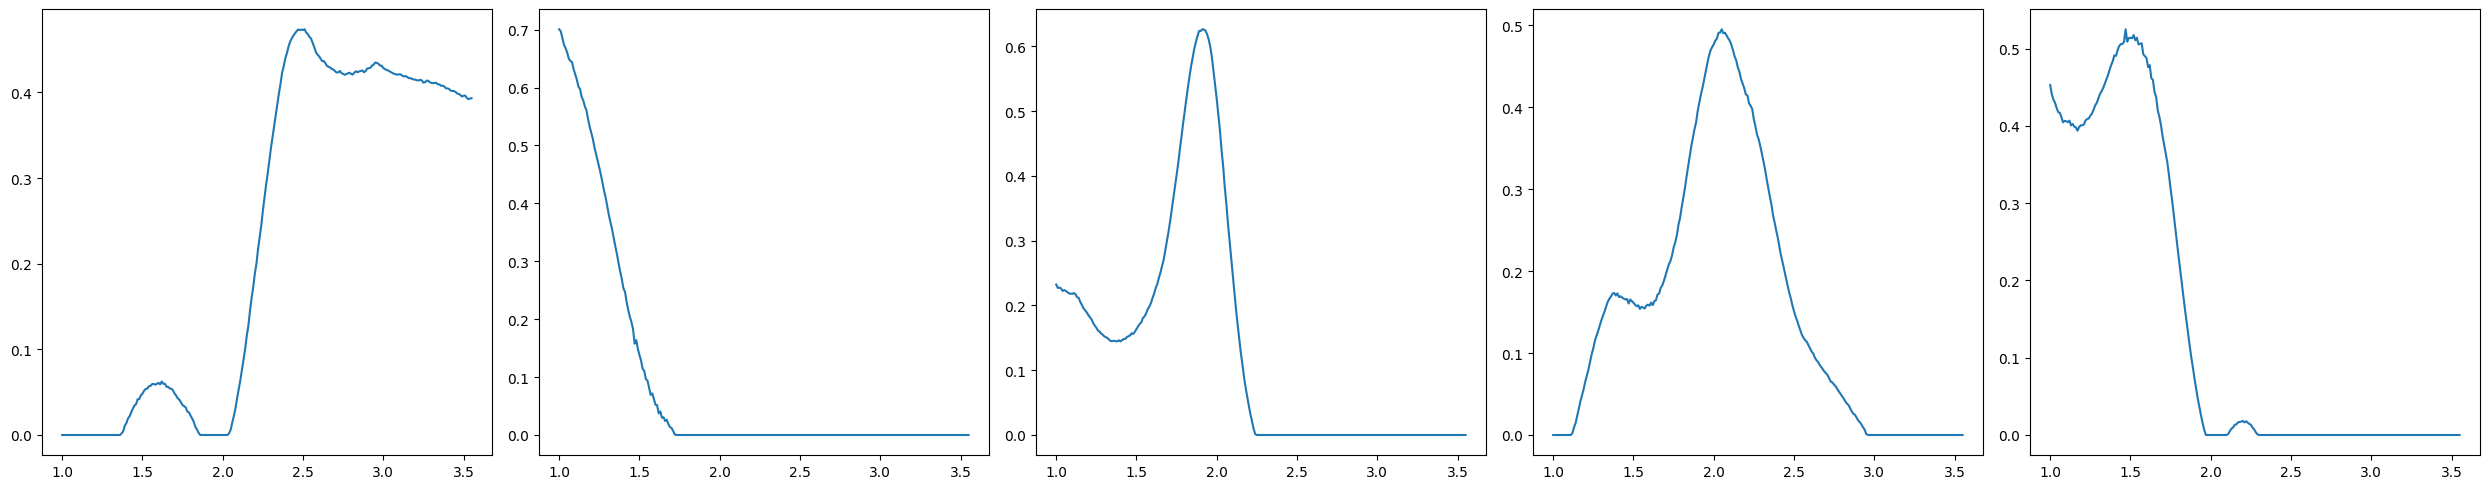

-----  -----------
epoch  60
loss    0.00876127
-----  -----------
0.63 minutes have passed


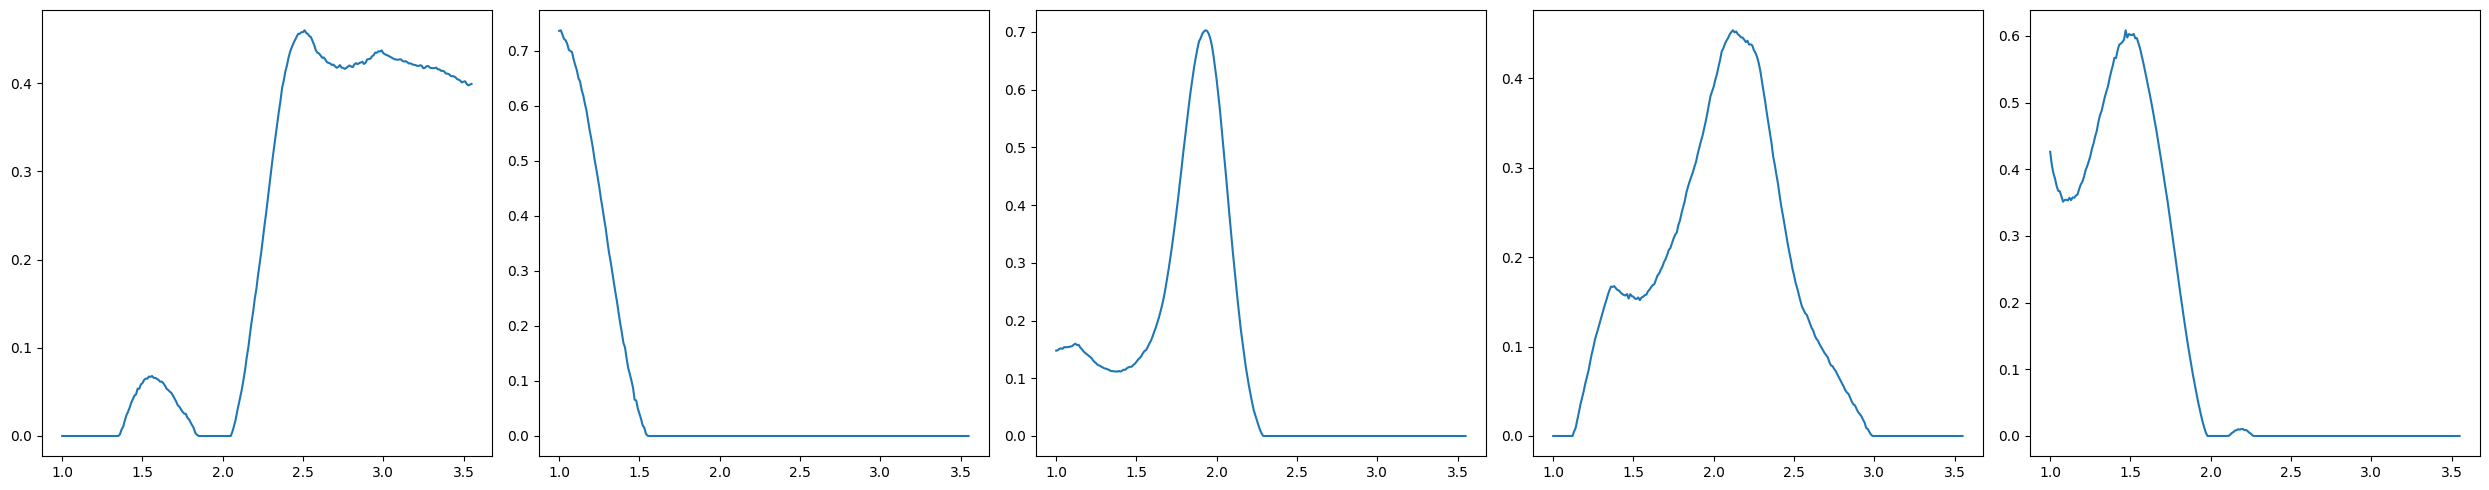

-----  -----------
epoch  80
loss    0.00875047
-----  -----------
0.86 minutes have passed


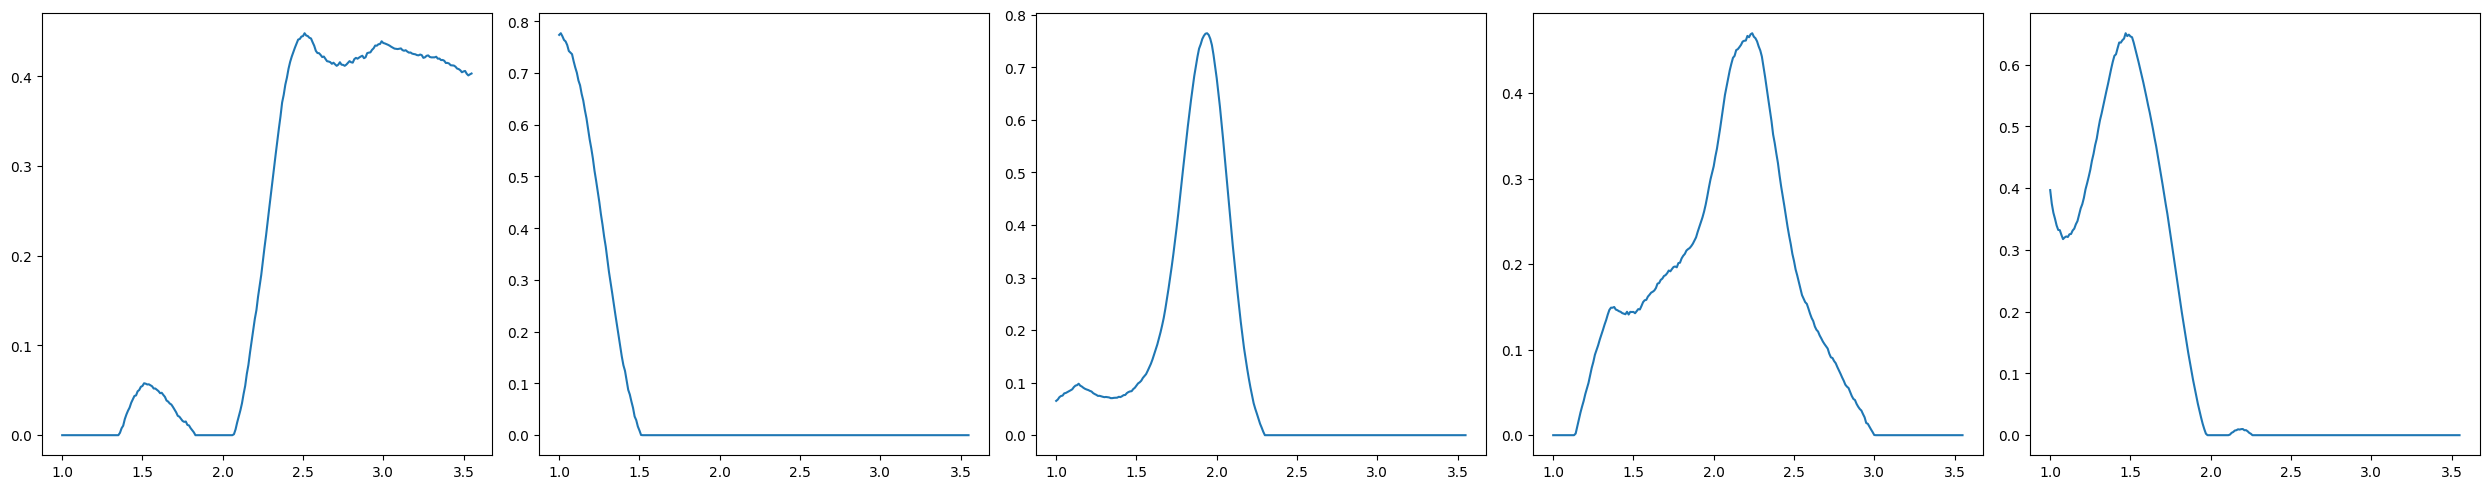

-----  ------------
epoch  100
loss     0.00874364
-----  ------------
1.07 minutes have passed


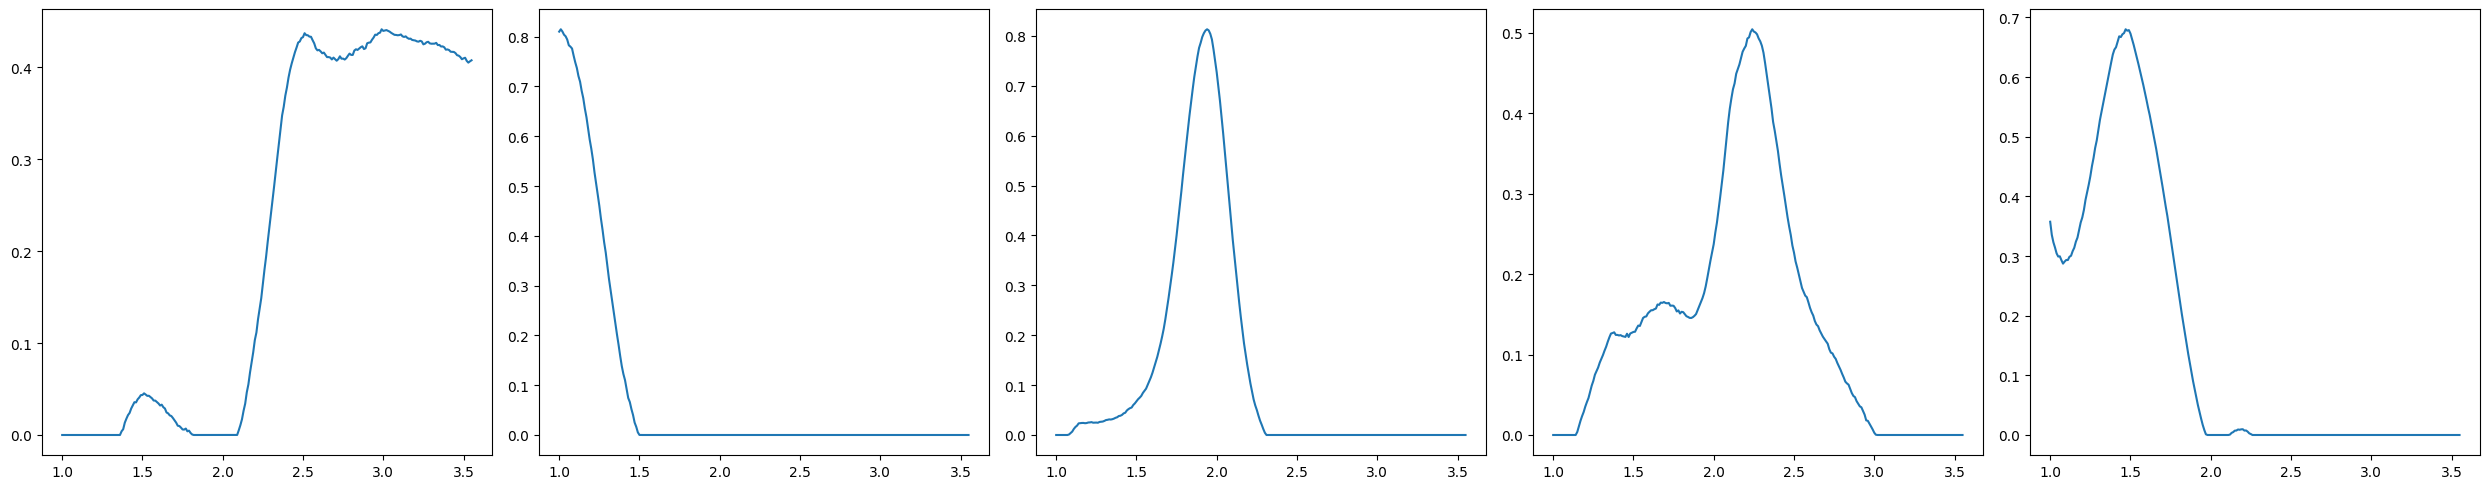

-----  ------------
epoch  120
loss     0.00873744
-----  ------------
1.28 minutes have passed


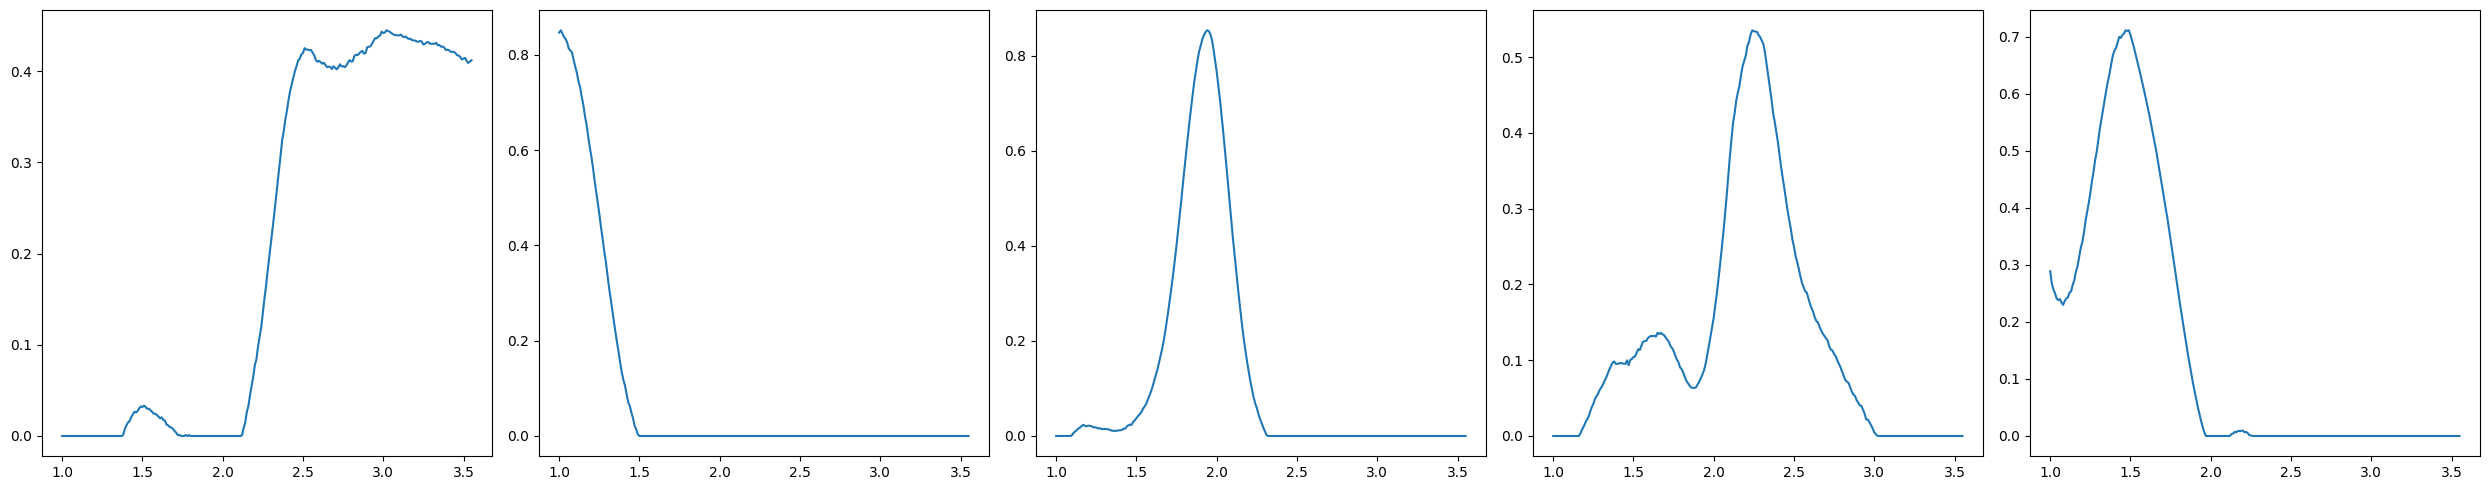

-----  -----------
epoch  140
loss     0.0087314
-----  -----------
1.49 minutes have passed


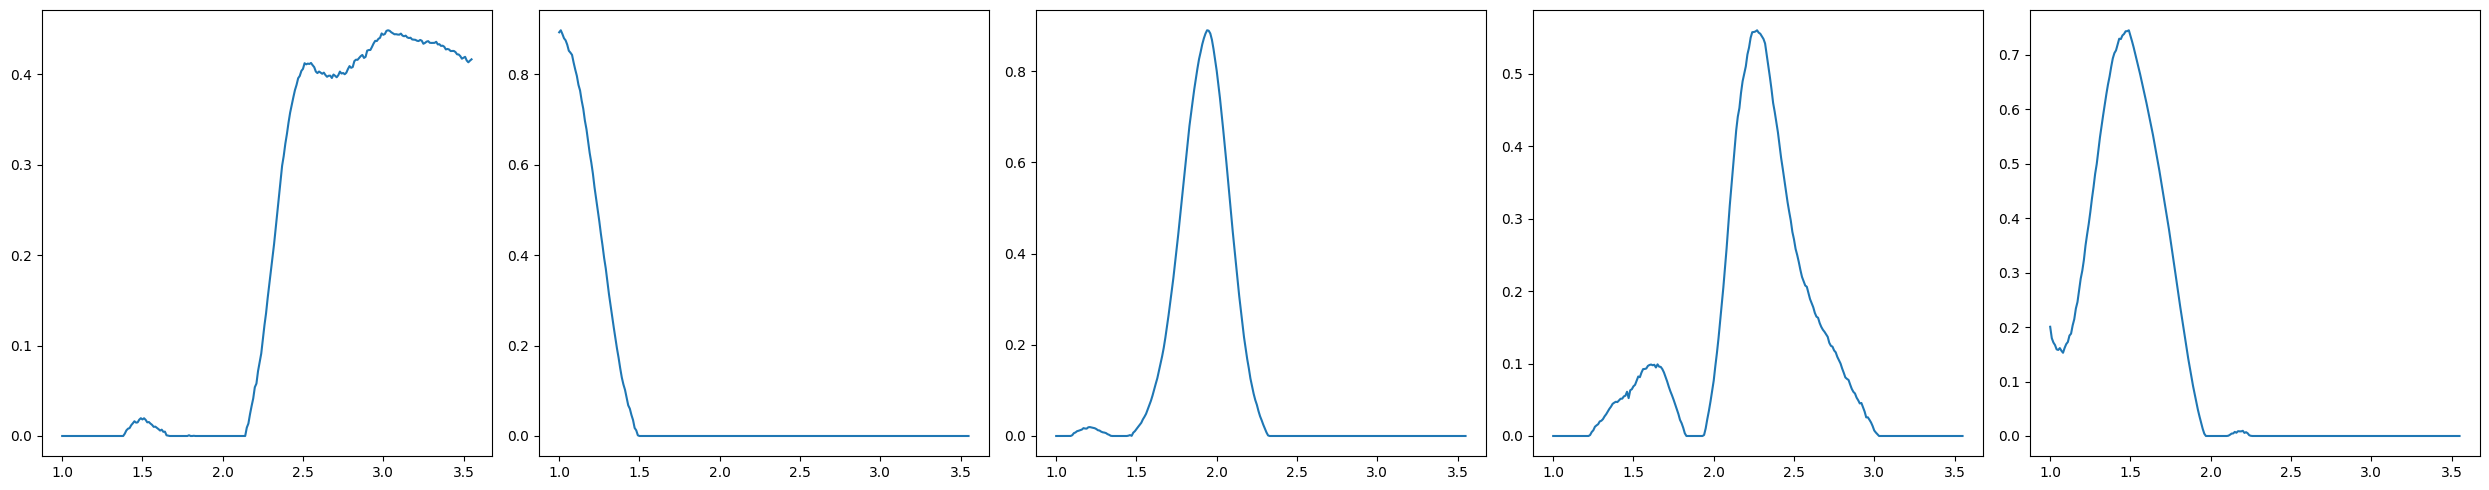

-----  ------------
epoch  160
loss     0.00872764
-----  ------------
1.70 minutes have passed


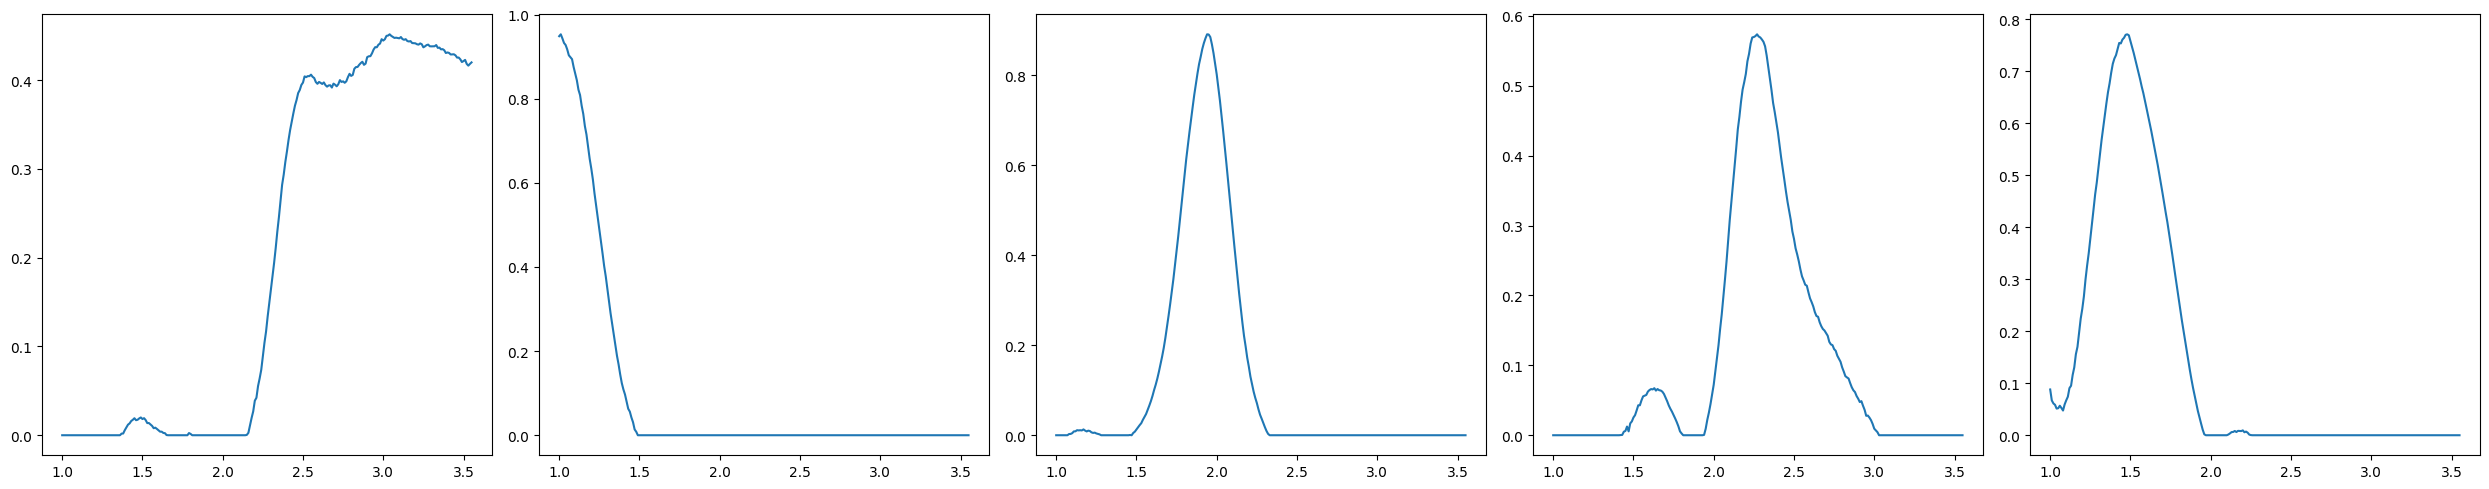

-----  -----------
epoch  180
loss     0.0087224
-----  -----------
1.90 minutes have passed


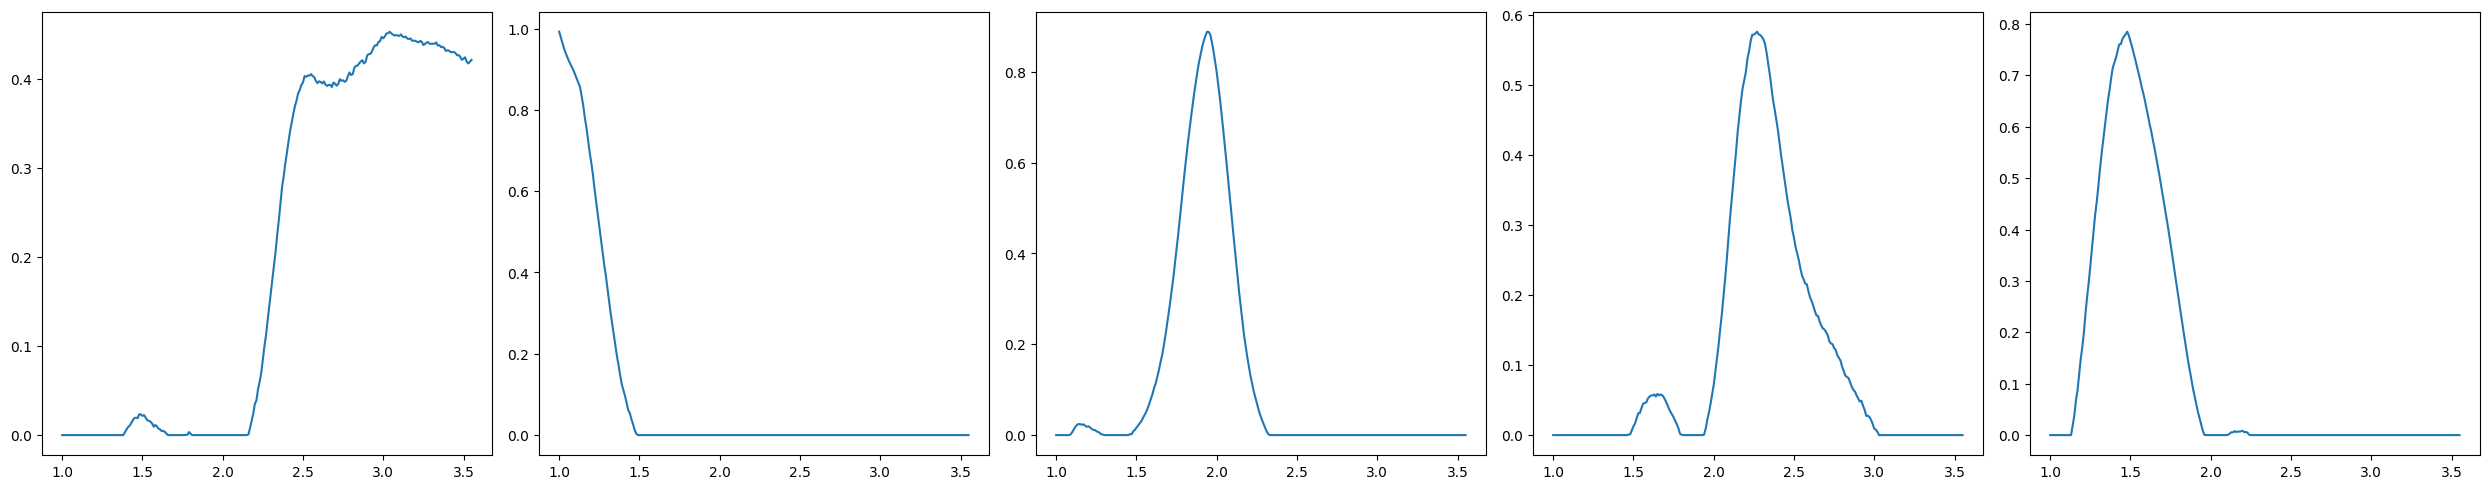

-----  ------------
epoch  200
loss     0.00872159
-----  ------------
2.12 minutes have passed


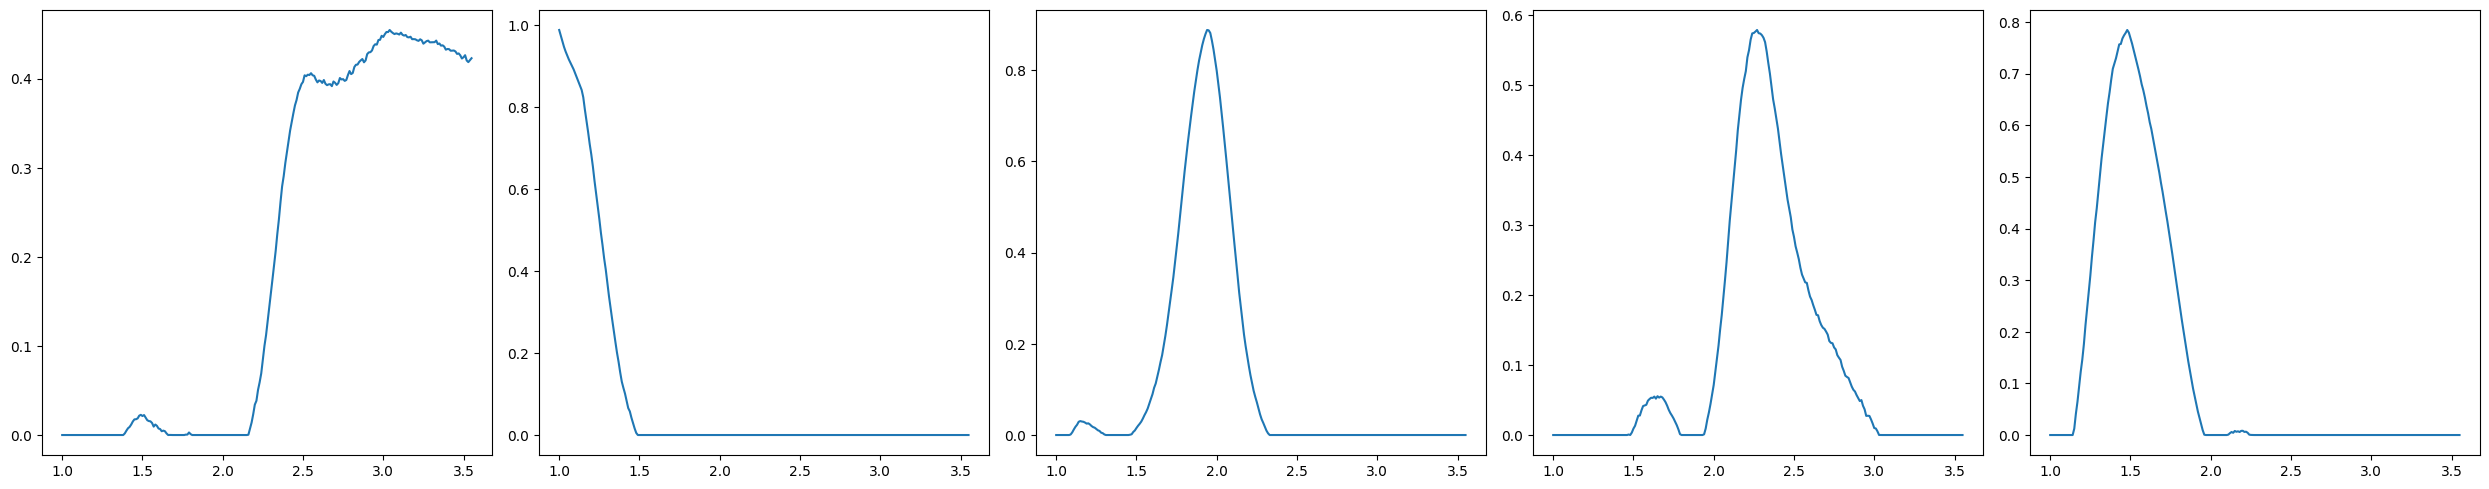

The training has been finished.


In [9]:
CAE.training(n_epoch=200, l_rate=0.01)

(104760, 5)
(5, 256)


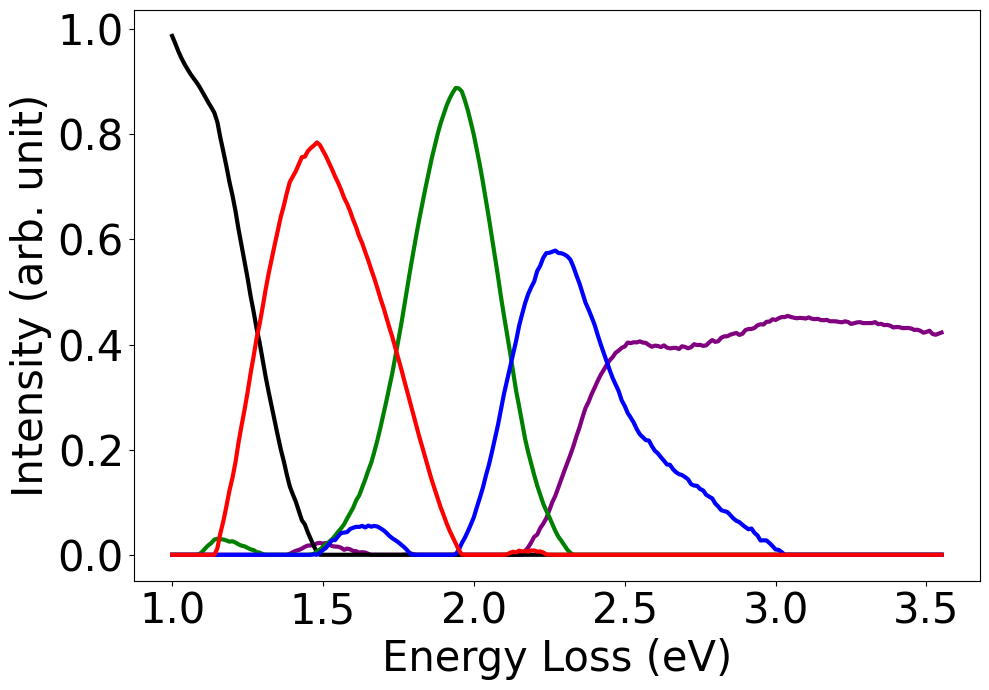

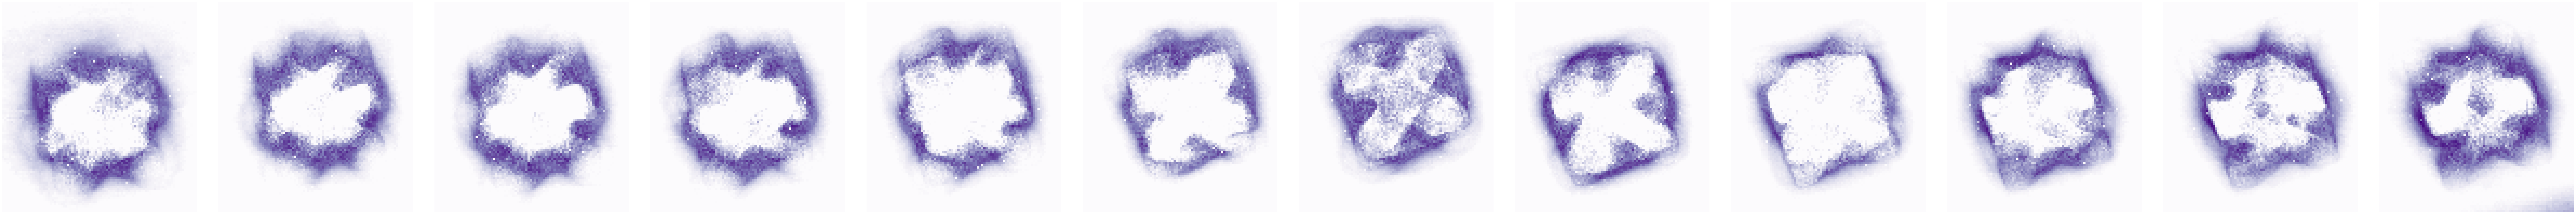

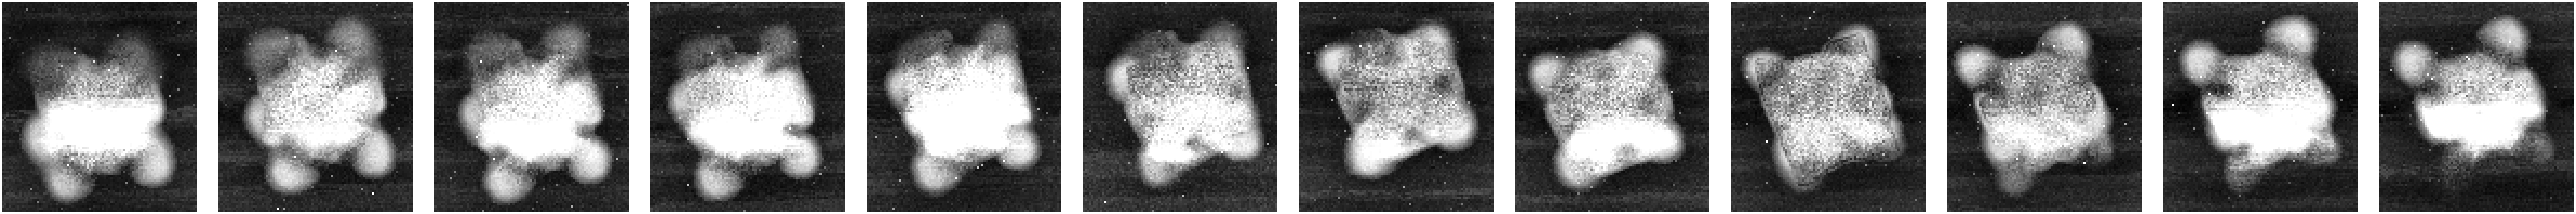

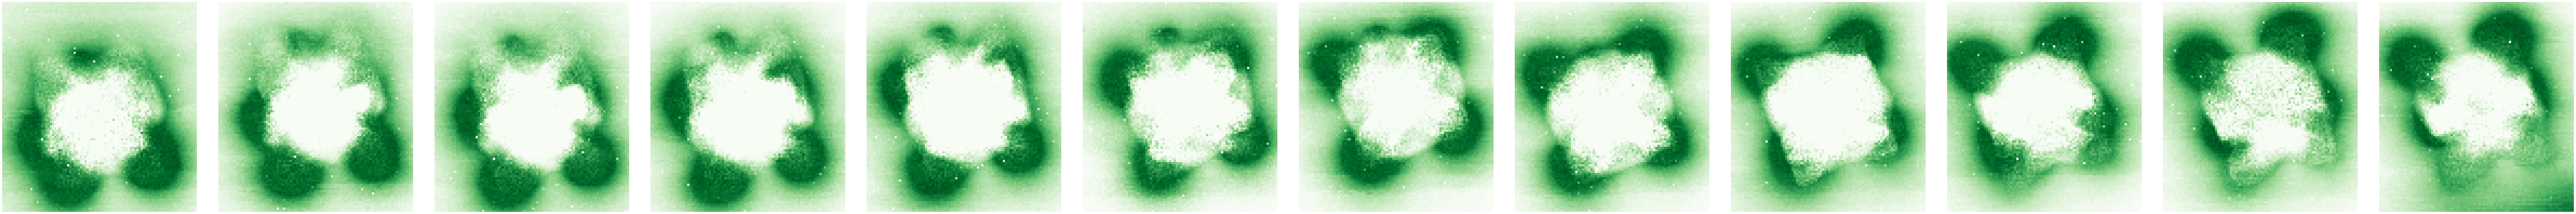

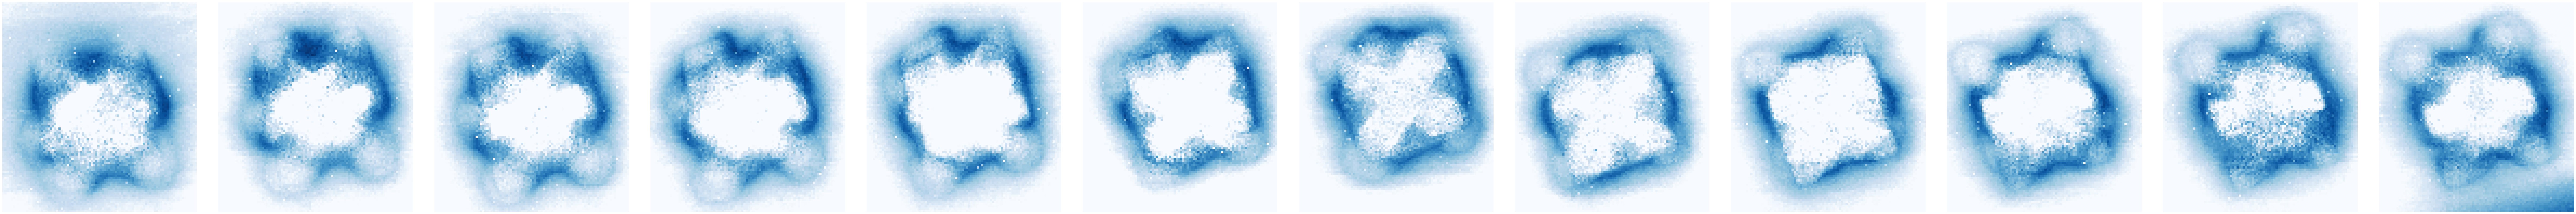

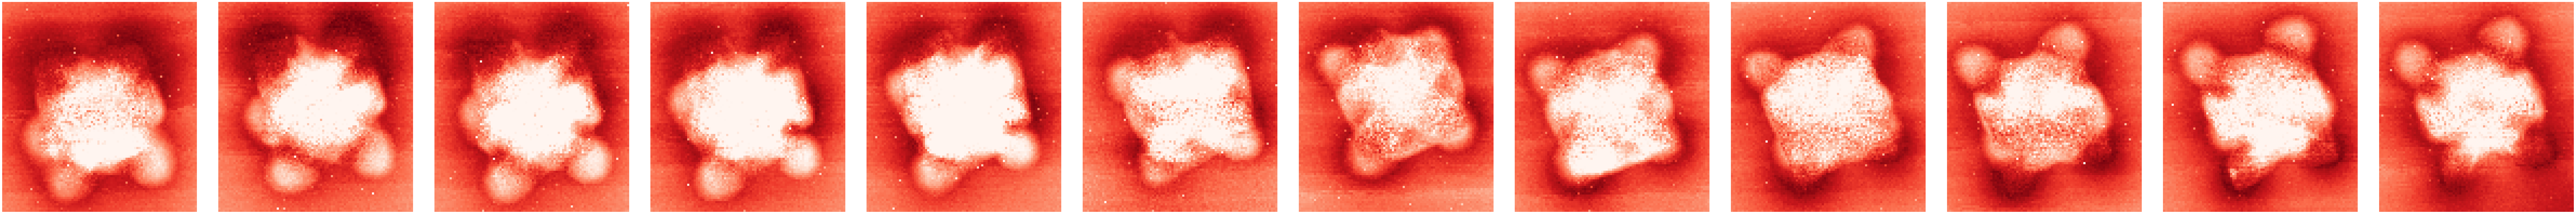

In [10]:
CAE.show_result(save_result=False, save_prefix="demo")